<a href="https://colab.research.google.com/github/alessandrasarah/projetos-python/blob/main/regressao_linear.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [51]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [52]:
import pandas as pd

In [53]:
dados = pd.read_excel('/content/drive/MyDrive/Programaria/analise_dados_mod7_(1).xlsx')

In [54]:
dados.head()

,ID,IDADE,FAIXA IDADE,GENERO,COR/RACA/ETNIA,PCD,EXPERIENCIA_PROFISSIONAL_PREJUDICADA,ASPECTOS_PREJUDICADOS,VIVE_NO_BRASIL,ESTADO ONDE MORA,...,Você pretende mudar de emprego nos próximos 6 meses?,Quais os principais critérios que você leva em consideração no momento de decidir onde trabalhar?,Atualmente qual a sua forma de trabalho?,Qual a forma de trabalho ideal para você?,Caso sua empresa decida pelo modelo 100% presencial qual será sua atitude?,Sua empresa passu por Layoff em 2022?,Atuacao,Quais das linguagens listadas abaixo você utiliza no trabalho?,EM_BUSCA,ABERTO_OPORTUNIDADES
0,zzqzz3l9ily8nuo2m7wyzzqzz3w48o96,39.0,35-39,Masculino,Parda,Não,Não acredito que minha experiência profissiona...,NaN,True,Distrito Federal (DF),...,Não estou buscando e não pretendo mudar de emp...,Benefícios,Modelo 100% presencial,Modelo híbrido com dias fixos de trabalho pres...,Vou aceitar e retornar ao modelo 100% presencial,Não ocorreram layoffs/demissões em massa na em...,Engenharia de Dados,SQL,0.0,0.0
1,zzls2oftfn9law393oezzls2ofhvfpzd,32.0,30-34,Masculino,Parda,Não,"Sim, acredito que a minha a experiência profis...",Aprovação em processos seletivos/entrevistas,True,Pará (PA),...,Estou em busca de oportunidades dentro ou fora...,"Remuneração/Salário, Plano de carreira e oport...",Modelo 100% presencial,Modelo híbrido flexível (o funcionário tem lib...,Vou aceitar e retornar ao modelo 100% presencial,Não ocorreram layoffs/demissões em massa na em...,Gestor,NaN,1.0,0.0
2,zzdwqzfqqp1ypc7ps6m0hzzdwqz292yi,53.0,50-54,Masculino,Branca,Não,NaN,NaN,True,Distrito Federal (DF),...,"Não estou buscando, mas me considero aberto a ...","Remuneração/Salário, Flexibilidade de trabalho...",Modelo híbrido com dias fixos de trabalho pres...,Modelo híbrido flexível (o funcionário tem lib...,Vou procurar outra oportunidade no modelo híbr...,Não ocorreram layoffs/demissões em massa na em...,desenvolve modelos preditivos e algoritmos de ...,1,0.0,1.0
3,zzbqh3uy7yk7k9qmkzzbqtb4s9faqspl,27.0,25-29,Masculino,Branca,Não,NaN,NaN,True,Minas Gerais (MG),...,"Não estou buscando, mas me considero aberto a ...","Remuneração/Salário, Flexibilidade de trabalho...",Modelo híbrido flexível (o funcionário tem lib...,Modelo híbrido flexível (o funcionário tem lib...,Vou procurar outra oportunidade no modelo híbr...,Não ocorreram layoffs/demissões em massa na em...,desenvolve modelos preditivos e algoritmos de ...,0,0.0,1.0
4,zzaf1m95yan929rb94wzzaf1mekhvhpg,46.0,45-49,Feminino,Branca,Não,Não acredito que minha experiência profissiona...,NaN,True,Pará (PA),...,"Não estou buscando, mas me considero aberto a ...","Remuneração/Salário, Oportunidade de aprendiza...",Modelo 100% presencial,Modelo 100% presencial,Vou aceitar e retornar ao modelo 100% presencial,Não ocorreram layoffs/demissões em massa na em...,Outra atuação,SQL,0.0,1.0


In [55]:
dados.columns

Index(['ID', 'IDADE', 'FAIXA IDADE', 'GENERO', 'COR/RACA/ETNIA', 'PCD',
       'EXPERIENCIA_PROFISSIONAL_PREJUDICADA', 'ASPECTOS_PREJUDICADOS',
       'VIVE_NO_BRASIL', 'ESTADO ONDE MORA', 'UF ONDE MORA',
       'REGIAO ONDE MORA', 'MUDOU DE ESTADO?', 'REGIAO DE ORIGEM',
       'NIVEL DE ENSINO', 'ÁREA DE FORMAÇÃO',
       'QUAL SUA SITUAÇÃO ATUAL DE TRABALHO?', 'SETOR',
       'NUMERO DE FUNCIONARIOS', 'GESTOR?', 'CARGO COMO GESTOR', 'CARGO ATUAL',
       'FAIXA SALARIAL',
       'QUANTO TEMPO DE EXPERIÊNCIA NA ÁREA DE DADOS VOCÊ TEM?',
       'QUANTO TEMPO DE EXPERIÊNCIA NA ÁREA DE TI/ENGENHARIA DE SOFTWARE VOCÊ TEVE ANTES DE COMEÇAR A TRABALHAR NA ÁREA DE DADOS?',
       'SALARIO', 'NOVO_NIVEL', 'NIVEL_Júnior', 'NIVEL_Pleno', 'NIVEL_Sênior',
       'GEARACAO', 'Quanto tempo de experiência na área de dados você tem?',
       'Quanto tempo de experiência na área de TI/Engenharia de Software você teve antes de começar a trabalhar na área de dados?',
       'Você está satisfeito na sua 

In [56]:
dados['QUAL SUA SITUAÇÃO ATUAL DE TRABALHO?'].value_counts()

,count
QUAL SUA SITUAÇÃO ATUAL DE TRABALHO?,
Empregado (CLT),2762
Empreendedor ou Empregado (CNPJ),410
"Desempregado, buscando recolocação",350
Estagiário,188
Servidor Público,156
Trabalho na área Acadêmica/Pesquisador,86
Somente Estudante (graduação),82
Vivo no Brasil e trabalho remoto para empresa de fora do Brasil,69
Vivo fora do Brasil e trabalho para empresa de fora do Brasil,46


In [57]:
dados = dados[dados['QUAL SUA SITUAÇÃO ATUAL DE TRABALHO?']=='Empregado (CLT)']

In [58]:
dados['QUAL SUA SITUAÇÃO ATUAL DE TRABALHO?'].value_counts()

,count
QUAL SUA SITUAÇÃO ATUAL DE TRABALHO?,
Empregado (CLT),2762


In [59]:
dados['COR/RACA/ETNIA'].value_counts()

,count
COR/RACA/ETNIA,
Branca,1805
Parda,661
Preta,181
Amarela,85
Prefiro não informar,16
Outra,10
Indígena,4


In [60]:
lista_retirar = ['Prefiro não informar','Outra','Indígena']

In [61]:
dados[~dados['COR/RACA/ETNIA'].isin(lista_retirar)]

,ID,IDADE,FAIXA IDADE,GENERO,COR/RACA/ETNIA,PCD,EXPERIENCIA_PROFISSIONAL_PREJUDICADA,ASPECTOS_PREJUDICADOS,VIVE_NO_BRASIL,ESTADO ONDE MORA,...,Você pretende mudar de emprego nos próximos 6 meses?,Quais os principais critérios que você leva em consideração no momento de decidir onde trabalhar?,Atualmente qual a sua forma de trabalho?,Qual a forma de trabalho ideal para você?,Caso sua empresa decida pelo modelo 100% presencial qual será sua atitude?,Sua empresa passu por Layoff em 2022?,Atuacao,Quais das linguagens listadas abaixo você utiliza no trabalho?,EM_BUSCA,ABERTO_OPORTUNIDADES
1,zzls2oftfn9law393oezzls2ofhvfpzd,32.0,30-34,Masculino,Parda,Não,"Sim, acredito que a minha a experiência profis...",Aprovação em processos seletivos/entrevistas,True,Pará (PA),...,Estou em busca de oportunidades dentro ou fora...,"Remuneração/Salário, Plano de carreira e oport...",Modelo 100% presencial,Modelo híbrido flexível (o funcionário tem lib...,Vou aceitar e retornar ao modelo 100% presencial,Não ocorreram layoffs/demissões em massa na em...,Gestor,NaN,1.0,0.0
2,zzdwqzfqqp1ypc7ps6m0hzzdwqz292yi,53.0,50-54,Masculino,Branca,Não,NaN,NaN,True,Distrito Federal (DF),...,"Não estou buscando, mas me considero aberto a ...","Remuneração/Salário, Flexibilidade de trabalho...",Modelo híbrido com dias fixos de trabalho pres...,Modelo híbrido flexível (o funcionário tem lib...,Vou procurar outra oportunidade no modelo híbr...,Não ocorreram layoffs/demissões em massa na em...,desenvolve modelos preditivos e algoritmos de ...,1,0.0,1.0
3,zzbqh3uy7yk7k9qmkzzbqtb4s9faqspl,27.0,25-29,Masculino,Branca,Não,NaN,NaN,True,Minas Gerais (MG),...,"Não estou buscando, mas me considero aberto a ...","Remuneração/Salário, Flexibilidade de trabalho...",Modelo híbrido flexível (o funcionário tem lib...,Modelo híbrido flexível (o funcionário tem lib...,Vou procurar outra oportunidade no modelo híbr...,Não ocorreram layoffs/demissões em massa na em...,desenvolve modelos preditivos e algoritmos de ...,0,0.0,1.0
6,zytlxsdgalh22cgrijvzytlxa49i8yzx,21.0,17-21,Masculino,Parda,Não,Não acredito que minha experiência profissiona...,NaN,True,São Paulo (SP),...,Não estou buscando e não pretendo mudar de emp...,Oportunidade de aprendizado e trabalhar com re...,Modelo híbrido com dias fixos de trabalho pres...,Modelo híbrido flexível (o funcionário tem lib...,Vou aceitar e retornar ao modelo 100% presencial,Não ocorreram layoffs/demissões em massa na em...,Análise de Dados,"SQL, Python, SAS/Stata",0.0,0.0
7,zyc0twzno2sm5or5ovoxzyc0twz0300d,31.0,30-34,Feminino,Branca,Não,Não acredito que minha experiência profissiona...,NaN,True,Rio Grande do Sul (RS),...,Estou em busca de oportunidades dentro ou fora...,"Remuneração/Salário, Propósito do trabalho e d...",Modelo 100% presencial,Modelo 100% remoto,Vou procurar outra oportunidade no modelo 100%...,Não ocorreram layoffs/demissões em massa na em...,Outra atuação,"SQL, JavaScript",1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4262,02vlm03c29g3fcys8tj06102vlm0983h,31.0,30-34,Masculino,Amarela,Não,Não acredito que minha experiência profissiona...,NaN,True,São Paulo (SP),...,"Não estou buscando, mas me considero aberto a ...","Remuneração/Salário, Flexibilidade de trabalho...",Modelo híbrido flexível (o funcionário tem lib...,Modelo híbrido flexível (o funcionário tem lib...,Vou aceitar e retornar ao modelo 100% presencial,Não ocorreram layoffs/demissões em massa na em...,Gestor,NaN,0.0,1.0
4263,02ido3x5siue5if02iz2taqjmcnh58xh,26.0,25-29,Masculino,Parda,Não,"Sim, acredito que a minha a experiência profis...",Quantidade de oportunidades de emprego/vagas r...,True,Rio de Janeiro (RJ),...,Não estou buscando e não pretendo mudar de emp...,"Remuneração/Salário, Benefícios, Plano de carr...",Modelo 100% remoto,Modelo híbrido flexível (o funcionário tem lib...,Vou procurar outra oportunidade no modelo híbr...,Não ocorreram layoffs/demissões em massa na em...,Engenharia de Dados,"Python, SQL",0.0,0

In [62]:
dados['NAO_BRANCA'] = dados['COR/RACA/ETNIA'].apply(lambda x: 1 if x != 'Branca' else 0)

In [63]:
dados['QUANTO TEMPO DE EXPERIÊNCIA NA ÁREA DE DADOS VOCÊ TEM?'].value_counts()

,count
QUANTO TEMPO DE EXPERIÊNCIA NA ÁREA DE DADOS VOCÊ TEM?,
de 1 a 2 anos,752
de 3 a 4 anos,586
de 4 a 6 anos,423
Menos de 1 ano,358
Mais de 10 anos,281
de 7 a 10 anos,235
Não tenho experiência na área de dados,127


In [64]:
dados['TEMPO_EXPERIENCIA'] = dados['QUANTO TEMPO DE EXPERIÊNCIA NA ÁREA DE DADOS VOCÊ TEM?'].str.extract(r'(\d+)')

In [65]:
dados['TEMPO_EXPERIENCIA'].value_counts()

,count
TEMPO_EXPERIENCIA,
1,1110
3,586
4,423
10,281
7,235


In [66]:
dados['NUMERO DE FUNCIONARIOS'].value_counts()

,count
NUMERO DE FUNCIONARIOS,
Acima de 3.000,1325
de 101 a 500,508
de 1.001 a 3.000,371
de 501 a 1.000,251
de 51 a 100,151
de 11 a 50,114
de 6 a 10,24
de 1 a 5,18


In [67]:
dados['NUMERO DE FUNCIONARIOS'] = dados['NUMERO DE FUNCIONARIOS'].str.replace('.','')

In [68]:
dados['NUMERO DE FUNCIONARIOS'] = dados['NUMERO DE FUNCIONARIOS'].str.extract(r'(\d+)')


In [69]:
dados['NUMERO DE FUNCIONARIOS'].value_counts(dropna=False)


,count
NUMERO DE FUNCIONARIOS,
3000,1325
101,508
1001,371
501,251
51,151
11,114
6,24
1,18


In [70]:
dados['TEMPO_EXPERIENCIA'].value_counts(dropna=False)

,count
TEMPO_EXPERIENCIA,
1,1110
3,586
4,423
10,281
7,235
NaN,127


In [71]:
dados['TEMPO_EXPERIENCIA'] = dados['TEMPO_EXPERIENCIA'].fillna(0)

In [72]:
dados['TEMPO_EXPERIENCIA'].value_counts()

,count
TEMPO_EXPERIENCIA,
1,1110
3,586
4,423
10,281
7,235
0,127


In [73]:
dados.columns


Index(['ID', 'IDADE', 'FAIXA IDADE', 'GENERO', 'COR/RACA/ETNIA', 'PCD',
       'EXPERIENCIA_PROFISSIONAL_PREJUDICADA', 'ASPECTOS_PREJUDICADOS',
       'VIVE_NO_BRASIL', 'ESTADO ONDE MORA', 'UF ONDE MORA',
       'REGIAO ONDE MORA', 'MUDOU DE ESTADO?', 'REGIAO DE ORIGEM',
       'NIVEL DE ENSINO', 'ÁREA DE FORMAÇÃO',
       'QUAL SUA SITUAÇÃO ATUAL DE TRABALHO?', 'SETOR',
       'NUMERO DE FUNCIONARIOS', 'GESTOR?', 'CARGO COMO GESTOR', 'CARGO ATUAL',
       'FAIXA SALARIAL',
       'QUANTO TEMPO DE EXPERIÊNCIA NA ÁREA DE DADOS VOCÊ TEM?',
       'QUANTO TEMPO DE EXPERIÊNCIA NA ÁREA DE TI/ENGENHARIA DE SOFTWARE VOCÊ TEVE ANTES DE COMEÇAR A TRABALHAR NA ÁREA DE DADOS?',
       'SALARIO', 'NOVO_NIVEL', 'NIVEL_Júnior', 'NIVEL_Pleno', 'NIVEL_Sênior',
       'GEARACAO', 'Quanto tempo de experiência na área de dados você tem?',
       'Quanto tempo de experiência na área de TI/Engenharia de Software você teve antes de começar a trabalhar na área de dados?',
       'Você está satisfeito na sua 

In [74]:
dados['Qual o principal motivo da sua insatisfação com a empresa atual?'].value_counts()

,count
Qual o principal motivo da sua insatisfação com a empresa atual?,
Gostaria de trabalhar em em outra área de atuação,71
Salário atual não corresponde ao mercado,53
Falta de maturidade analítica na empresa,46
Falta de oportunidade de crescimento no emprego atual,46
"Falta de oportunidade de crescimento no emprego atual, Salário atual não corresponde ao mercado, Falta de maturidade analítica na empresa",28
...,...
Falta de organização nos processos internos,1
"Gostaria de receber mais benefícios, O clima de trabalho/ambiente não é bom, Falta de oportunidade de crescimento no emprego atual",1
"Gostaria de receber mais benefícios, Falta de oportunidade de crescimento no emprego atual, O clima de trabalho/ambiente não é bom",1


In [75]:
dados['INSATISFAÇÃO']=0

In [76]:
dados.loc[dados['Qual o principal motivo da sua insatisfação com a empresa atual?'].notnull(),  'INSATISFAÇÃO'] = dados.loc[dados['Qual o principal motivo da sua insatisfação com a empresa atual?'].notnull(), 'Qual o principal motivo da sua insatisfação com a empresa atual?'].apply(lambda x: 1 if 'Salário' in x else 0 )

In [77]:
dados['INSATISFAÇÃO'].value_counts()

,count
INSATISFAÇÃO,
0,2478
1,284


In [78]:
dados['NIVEL DE ENSINO'].value_counts()

,count
NIVEL DE ENSINO,
Graduação/Bacharelado,1038
Pós-graduação,987
Mestrado,309
Estudante de Graduação,272
Doutorado ou Phd,100
Não tenho graduação formal,52
Prefiro não informar,4


In [95]:
dados['NIVEL DE ENSINO'].apply(lambda x:0 if x=='Não tenho graduação formal' else
                               1 if x=='Estudante de Graduação' else
                               2 if x=='Graduação/Bacharelado' else
                               7 if x=='Pós-graduação' else
                               4 if x=='Mestrado' else
                               5 if x=='Doutorado ou Phd' else -1)

,NIVEL DE ENSINO
1,2
2,7
3,5
6,1
7,2
...,...
4262,7
4263,2
4266,2
4267,4


In [80]:
dados.columns

Index(['ID', 'IDADE', 'FAIXA IDADE', 'GENERO', 'COR/RACA/ETNIA', 'PCD',
       'EXPERIENCIA_PROFISSIONAL_PREJUDICADA', 'ASPECTOS_PREJUDICADOS',
       'VIVE_NO_BRASIL', 'ESTADO ONDE MORA', 'UF ONDE MORA',
       'REGIAO ONDE MORA', 'MUDOU DE ESTADO?', 'REGIAO DE ORIGEM',
       'NIVEL DE ENSINO', 'ÁREA DE FORMAÇÃO',
       'QUAL SUA SITUAÇÃO ATUAL DE TRABALHO?', 'SETOR',
       'NUMERO DE FUNCIONARIOS', 'GESTOR?', 'CARGO COMO GESTOR', 'CARGO ATUAL',
       'FAIXA SALARIAL',
       'QUANTO TEMPO DE EXPERIÊNCIA NA ÁREA DE DADOS VOCÊ TEM?',
       'QUANTO TEMPO DE EXPERIÊNCIA NA ÁREA DE TI/ENGENHARIA DE SOFTWARE VOCÊ TEVE ANTES DE COMEÇAR A TRABALHAR NA ÁREA DE DADOS?',
       'SALARIO', 'NOVO_NIVEL', 'NIVEL_Júnior', 'NIVEL_Pleno', 'NIVEL_Sênior',
       'GEARACAO', 'Quanto tempo de experiência na área de dados você tem?',
       'Quanto tempo de experiência na área de TI/Engenharia de Software você teve antes de começar a trabalhar na área de dados?',
       'Você está satisfeito na sua 

In [81]:
dados = dados[['IDADE','GENERO','NAO_BRANCA','TEMPO_EXPERIENCIA','INSATISFAÇÃO','SETOR','REGIAO ONDE MORA','NIVEL DE ENSINO','NUMERO DE FUNCIONARIOS','SALARIO','NOVO_NIVEL']]

In [82]:
dados.columns

Index(['IDADE', 'GENERO', 'NAO_BRANCA', 'TEMPO_EXPERIENCIA', 'INSATISFAÇÃO',
       'SETOR', 'REGIAO ONDE MORA', 'NIVEL DE ENSINO',
       'NUMERO DE FUNCIONARIOS', 'SALARIO', 'NOVO_NIVEL'],
      dtype='object')

In [83]:
dados = pd.get_dummies(dados, columns=['GENERO','SETOR','NOVO_NIVEL','REGIAO ONDE MORA'], drop_first=True)

In [84]:
x = dados.drop('SALARIO', axis=1)
y = dados['SALARIO']

In [85]:
from sklearn.model_selection import train_test_split

In [86]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [87]:
from sklearn.preprocessing import StandardScaler

In [88]:
x_train.dtypes


,0
IDADE,float64
NAO_BRANCA,int64
TEMPO_EXPERIENCIA,object
INSATISFAÇÃO,int64
NIVEL DE ENSINO,object
NUMERO DE FUNCIONARIOS,object
GENERO_Masculino,bool
GENERO_Prefiro não informar,bool
SETOR_Educação,bool
SETOR_Entretenimento ou Esportes,bool


In [98]:
scaler = StandardScaler()

x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.fit_transform(x_test)

ValueError: could not convert string to float: 'Pós-graduação'

In [99]:
x_train.dtypes



,0
IDADE,float64
NAO_BRANCA,int64
TEMPO_EXPERIENCIA,object
INSATISFAÇÃO,int64
NIVEL DE ENSINO,object
NUMERO DE FUNCIONARIOS,object
GENERO_Masculino,bool
GENERO_Prefiro não informar,bool
SETOR_Educação,bool
SETOR_Entretenimento ou Esportes,bool


In [100]:
num_cols = x_train.select_dtypes(include=['int64', 'float64']).columns
cat_cols = x_train.select_dtypes(include=['object']).columns


In [101]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train[num_cols])
x_test_scaled = scaler.transform(x_test[num_cols])


In [104]:
model = LinearRegression()


In [105]:
model = LinearRegression()
model.fit(x_train_scaled, y_train)

LinearRegression()

In [107]:
y_pred = model.predict(x_test_scaled)

In [111]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [109]:
mse = mean_squared_error(y_test, y_pred)


In [110]:
mse

59106104.561964594

In [112]:
mae = mean_absolute_error(y_test, y_pred)


In [113]:
mae

5151.108018394566

In [114]:
r2 = r2_score(y_test, y_pred)

In [115]:
r2

0.03873799326223515

In [116]:
import matplotlib.pyplot as plt

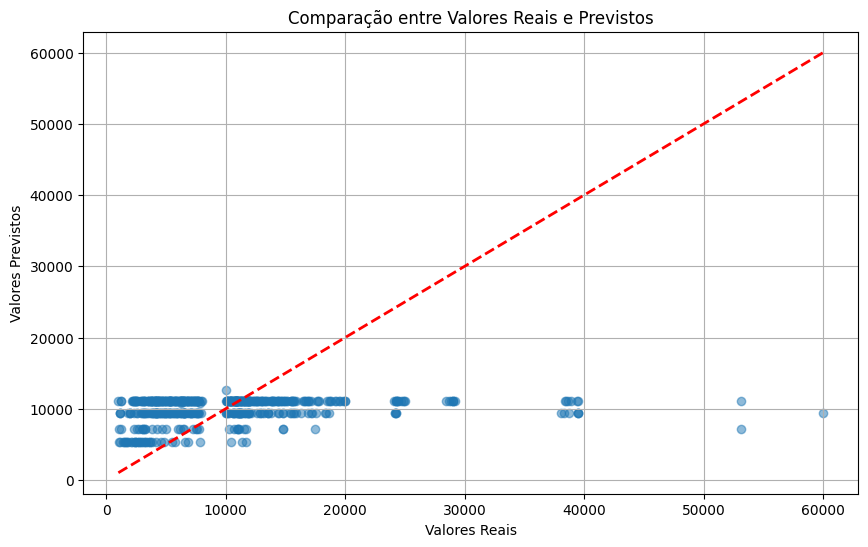

In [117]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha = 0.5)
plt.xlabel('Valores Reais')
plt.ylabel('Valores Previstos')
plt.title('Comparação entre Valores Reais e Previstos')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', linewidth=2)
plt.grid(True)
plt.show()


In [118]:
nomes_atributos = x_train.columns

In [122]:
nomes_atributos

Index(['IDADE', 'NAO_BRANCA', 'TEMPO_EXPERIENCIA', 'INSATISFAÇÃO',
       'NIVEL DE ENSINO', 'NUMERO DE FUNCIONARIOS', 'GENERO_Masculino',
       'GENERO_Prefiro não informar', 'SETOR_Educação',
       'SETOR_Entretenimento ou Esportes', 'SETOR_Filantropia/ONG's',
       'SETOR_Finanças ou Bancos', 'SETOR_Indústria',
       'SETOR_Internet/Ecommerce', 'SETOR_Marketing', 'SETOR_Outra Opção',
       'SETOR_Seguros ou Previdência', 'SETOR_Setor Alimentício',
       'SETOR_Setor Automotivo', 'SETOR_Setor Farmaceutico',
       'SETOR_Setor Imobiliário/ Construção Civil', 'SETOR_Setor Público',
       'SETOR_Setor de Energia', 'SETOR_Tecnologia/Fábrica de Software',
       'SETOR_Telecomunicação', 'SETOR_Varejo', 'SETOR_Área da Saúde',
       'SETOR_Área de Consultoria', 'NOVO_NIVEL_Pessoa Gestora',
       'NOVO_NIVEL_Pleno', 'NOVO_NIVEL_Sênior', 'REGIAO ONDE MORA_Nordeste',
       'REGIAO ONDE MORA_Norte', 'REGIAO ONDE MORA_Sudeste',
       'REGIAO ONDE MORA_Sul'],
      dtype='object')

In [127]:
coefs = pd.DataFrame({'atributos': nomes_atributos, 'coeficientes': model.coef_})

ValueError: All arrays must be of the same length